In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima

# Data Import and Exploration

In [5]:
train_files = ["2010_02_17_labels.txt",
 "2010_03_05_labels.txt",
 "2010_05_08_labels.txt",
 "2010_07_27_labels.txt",
 "2010_08_12_labels.txt",
 "2010_09_29_labels.txt",
 "2010_10_31_labels.txt",
 "2011_01_19_labels.txt",
 "2011_02_20_labels.txt",
 "2011_06_12_labels.txt",
 "2011_07_30_labels.txt",
 "2011_08_15_labels.txt",
 "2011_09_16_labels.txt"]
test_file1 = "2011_10_18_labels.txt"

In [6]:
test_df1 = pd.read_csv(test_file1,skiprows=6,sep='\t')
test_df1['Date'] = test_file1[-21:-17]+'-'+test_file1[-16:-14]+'-'+test_file1[-13:-11]
test_df1.drop(columns = ['Name','X','Y','Color','Desc'],inplace=True)
test_df1 = test_df1.reset_index(drop=True)
test_df1

,Lon,Lat,Label,radiance_1,radiance_2,radiance_3,radiance_4,radiance_5,radiance_6,radiance_7,Date
0,-121.837432,46.930863,snow,193.00082,223.07921,202.41002,127.26494,1.79630,6.609180,0.702164,2011-10-18
1,-121.836417,46.889531,snow,162.36761,152.11742,133.50603,80.83588,0.95385,6.387680,0.374409,2011-10-18
2,-121.882736,46.867537,woods,29.87903,24.67581,17.62202,45.79508,5.88820,7.882805,0.898817,2011-10-18
3,-121.849127,46.856135,woods,53.61976,46.39881,38.50202,34.40682,5.28645,8.215055,1.619878,2011-10-18
4,-121.849813,46.824015,woods,39.83482,36.26141,29.10602,64.19150,7.45275,7.993555,1.488776,2011-10-18
...,...,...,...,...,...,...,...,...,...,...,...
56,-121.876032,46.754891,woods,24.51822,14.53841,7.18202,9.00224,0.59280,7.439805,0.112205,2011-10-18
57,-121.662880,46.807333,woods,33.70818,26.12401,18.66602,20.39050,3.48120,7.661305,0.964368,2011-10-18
58,-121.618581,46.745593,woods,26.04988,15.98661,8.22602,23.89458,1.19455,7.439805,0.177756,2011-10-18
59,-121.721018,46.791530,woods,27.58154,15.98661,8.22602,16.88642,1.07420,6.941430,0.177756,2011-10-18


In [7]:
df = pd.DataFrame()
for f in train_files:
    dft = pd.read_csv(f,skiprows=7, sep='\t',header = None)
    dft['Date'] = f[-21:-17]+'-'+f[-16:-14]+'-'+f[-13:-11]
    df = pd.concat([df,dft])
df.columns = ['Name','X','Y','Lon','Lat','Color','Label','Desc','radiance_1','radiance_2','radiance_3','radiance_4','radiance_5','radiance_6','radiance_7','Date']
df.drop(columns = ['Name','X','Y','Color','Desc'],inplace=True)
df = df.reset_index(drop=True)
df

,Lon,Lat,Label,radiance_1,radiance_2,radiance_3,radiance_4,radiance_5,radiance_6,radiance_7,Date
0,-121.838210,46.924327,snow,170.02592,156.46200,119.93402,101.86036,1.67595,5.778555,0.308858,2010-02-17
1,-121.845250,46.890112,snow,129.43694,102.87861,88.61402,55.43130,1.07420,5.169430,0.308858,2010-02-17
2,-121.882736,46.867537,snow,183.04503,165.15121,146.03403,96.60424,1.19455,5.612430,0.243307,2010-02-17
3,-121.849127,46.856135,snow,193.00082,262.18060,233.73003,150.91748,1.55560,5.944680,0.505511,2010-02-17
4,-121.849813,46.824015,snow,193.00082,301.28200,264.00600,175.44604,2.39805,5.889305,0.571062,2010-02-17
...,...,...,...,...,...,...,...,...,...,...,...
721,-121.872096,46.717596,woods,58.21474,43.50241,29.10602,42.29100,3.84225,6.332305,0.833266,2011-09-16
722,-121.876032,46.754891,woods,58.21474,42.05421,30.15002,35.28284,2.99980,6.110805,0.767715,2011-09-16
723,-121.556927,46.770262,woods,46.72729,30.46861,19.71002,46.67110,3.60155,7.052180,0.571062,2011-09-16
724,-121.721018,46.791530,woods,52.85393,39.15781,25.97402,40.53896,3.72190,6.553805,0.767715,2011-09-16


<AxesSubplot:xlabel='Label', ylabel='Count'>

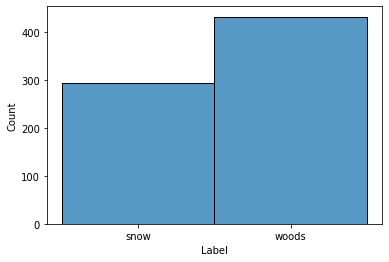

In [8]:
sns.histplot(data=df, x='Label')

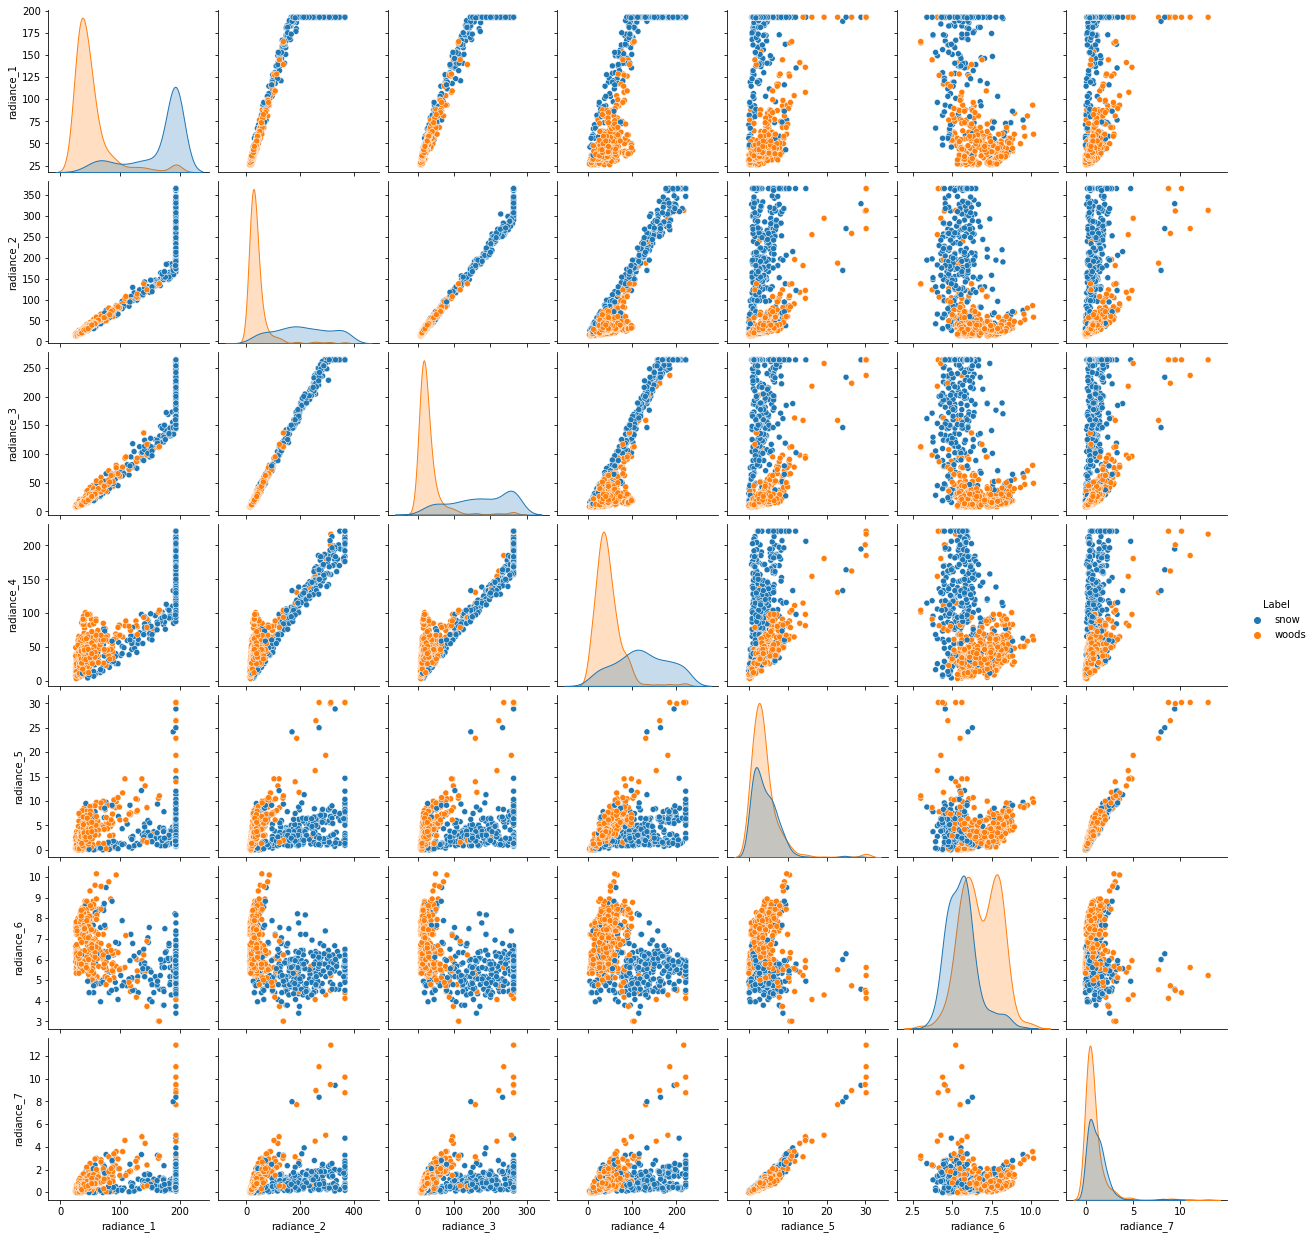

In [9]:
sns.pairplot(df[['radiance_1','radiance_2','radiance_3','radiance_4','radiance_5','radiance_6','radiance_7','Label']],hue='Label')

#### Encode labels to change from categorical to numerica

In [10]:
encoder = LabelEncoder()
df['Label_encoded']= encoder.fit_transform(df['Label'])
  
df['Label_encoded'].unique()

array([0, 1])

In [11]:
test_df1['Label_encoded']= encoder.fit_transform(test_df1['Label'])

In [12]:
df

,Lon,Lat,Label,radiance_1,radiance_2,radiance_3,radiance_4,radiance_5,radiance_6,radiance_7,Date,Label_encoded
0,-121.838210,46.924327,snow,170.02592,156.46200,119.93402,101.86036,1.67595,5.778555,0.308858,2010-02-17,0
1,-121.845250,46.890112,snow,129.43694,102.87861,88.61402,55.43130,1.07420,5.169430,0.308858,2010-02-17,0
2,-121.882736,46.867537,snow,183.04503,165.15121,146.03403,96.60424,1.19455,5.612430,0.243307,2010-02-17,0
3,-121.849127,46.856135,snow,193.00082,262.18060,233.73003,150.91748,1.55560,5.944680,0.505511,2010-02-17,0
4,-121.849813,46.824015,snow,193.00082,301.28200,264.00600,175.44604,2.39805,5.889305,0.571062,2010-02-17,0
...,...,...,...,...,...,...,...,...,...,...,...,...
721,-121.872096,46.717596,woods,58.21474,43.50241,29.10602,42.29100,3.84225,6.332305,0.833266,2011-09-16,1
722,-121.876032,46.754891,woods,58.21474,42.05421,30.15002,35.28284,2.99980,6.110805,0.767715,2011-09-16,1
723,-121.556927,46.770262,woods,46.72729,30.46861,19.71002,46.67110,3.60155,7.052180,0.571062,2011-09-16,1
724,-121.721018,46.791530,woods,52.85393,39.15781,25.97402,40.53896,3.72190,6.553805,0.767715,2011-09-16,1


#### Plot of first image labels, 2010-02-17

<AxesSubplot:xlabel='Lon', ylabel='Lat'>

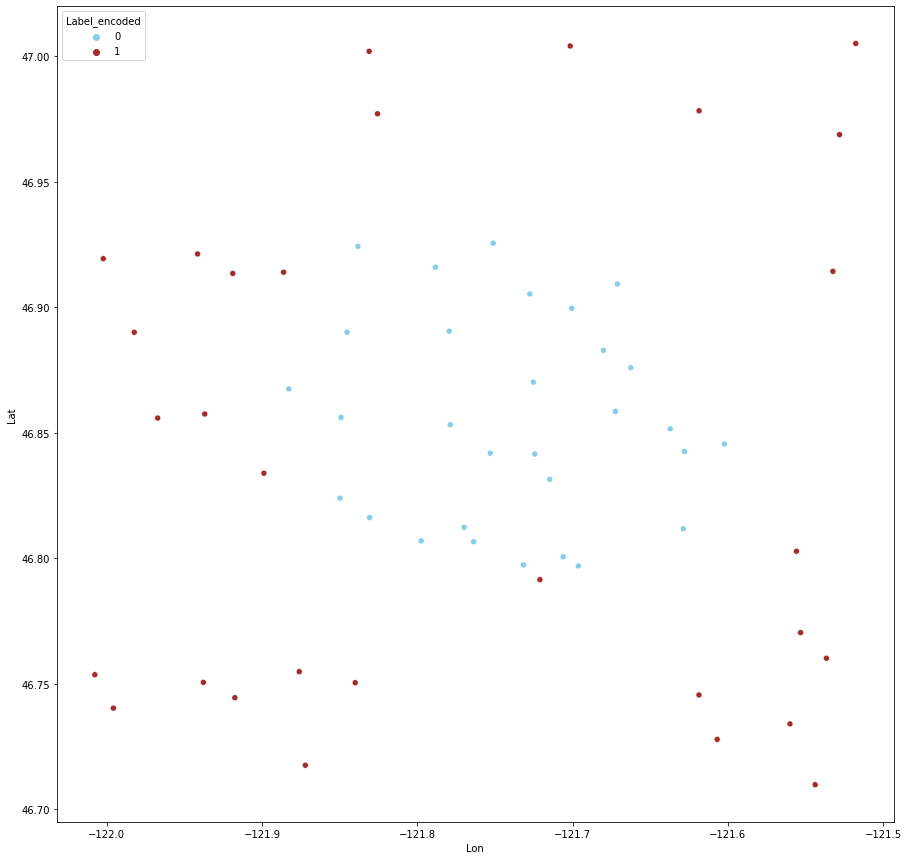

In [13]:
fig, axes = plt.subplots(1,1,figsize = (15,15))
sns.scatterplot(ax=axes,data=df.iloc[0:60],x='Lon',y='Lat', hue='Label_encoded',palette=['skyblue','brown'])

# Classification

In [14]:
X_train = df[['radiance_1','radiance_2','radiance_3','radiance_4','radiance_5','radiance_6','radiance_7']]
y_train = df['Label_encoded']
X_test1 = test_df1[['radiance_1','radiance_2','radiance_3','radiance_4','radiance_5','radiance_6','radiance_7']]
y_test1 = test_df1['Label_encoded']
print(X_train.shape,y_train.shape,X_test1.shape,y_test1.shape)

(726, 7) (726,) (61, 7) (61,)


In [15]:
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train)
Pred_y1 = knn.predict(X_test1)
print("Accuracy at K=5:",accuracy_score(y_test1, Pred_y1))

Accuracy at K=5: 0.9016393442622951


In [16]:
accuracy_score(y_train,knn.predict(X_train))

0.9393939393939394

In [17]:
test_df1['knn_Label_pred']=Pred_y1

[Text(0.5, 1.0, 'Predicted')]

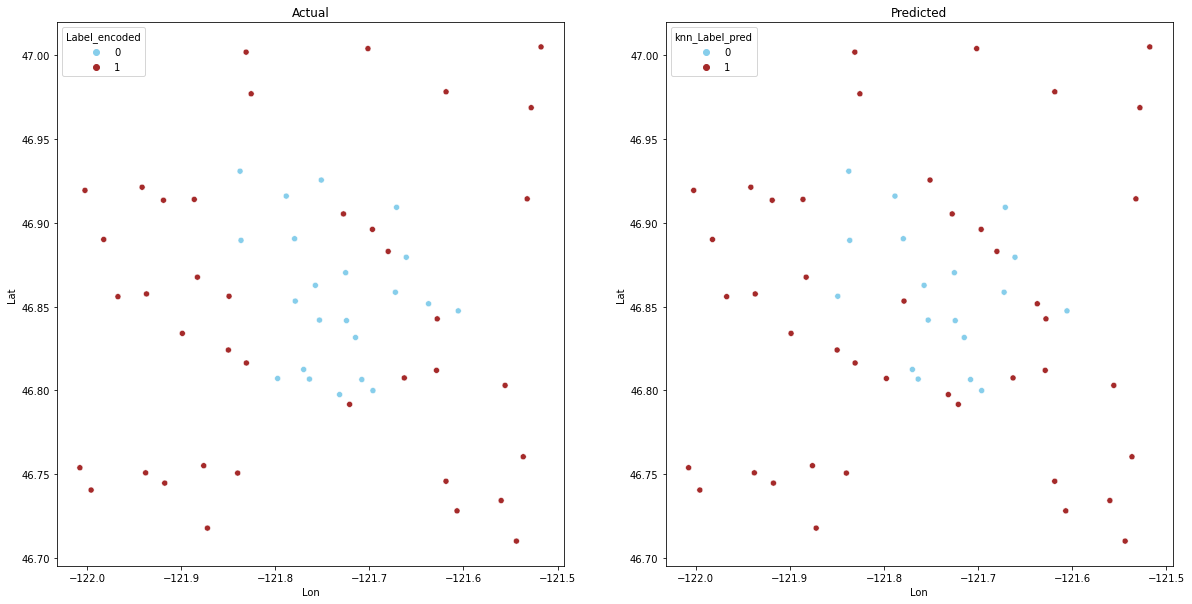

In [18]:
fig, axes = plt.subplots(1,2,figsize = (20,10))
sns.scatterplot(ax=axes[0],data=test_df1,x='Lon',y='Lat', hue='Label_encoded',palette=['skyblue', 'brown']).set(title='Actual')
sns.scatterplot(ax=axes[1],data=test_df1,x='Lon',y='Lat', hue='knn_Label_pred',palette=['skyblue', 'brown']).set(title='Predicted')

In [19]:
all_pixel_df1 = pd.read_csv("2011_10_18_all_pixels.txt",skiprows=4,sep='\t')
all_pixel_df1.drop(columns = ['Pixel-X','Pixel-Y','flags'],inplace=True)
all_pixel_df1 = all_pixel_df1.reset_index(drop=True)
all_pixel_df1

,Longitude,Latitude,radiance_1,radiance_2,radiance_3,radiance_4,radiance_5,radiance_6,radiance_7
0,-121.960566,46.995425,28.34737,21.77941,11.35802,41.41498,3.96260,7.661305,0.571062
1,-121.960172,46.995422,26.81571,20.33121,10.31402,36.15886,3.12015,7.605930,0.571062
2,-121.959777,46.995418,26.81571,17.43481,9.27002,33.53080,2.87945,7.605930,0.439960
3,-121.959383,46.995414,28.34737,18.88301,10.31402,38.78692,3.84225,7.605930,0.505511
4,-121.958988,46.995411,27.58154,18.88301,10.31402,42.29100,3.12015,7.550555,0.505511
...,...,...,...,...,...,...,...,...,...
950815,-121.496771,46.775915,24.51822,13.09021,6.13802,13.38234,0.95385,6.886055,0.112205
950816,-121.496378,46.775910,21.45490,13.09021,7.18202,12.50632,0.59280,6.886055,0.112205
950817,-121.495985,46.775905,23.75239,13.09021,7.18202,13.38234,0.71315,6.886055,0.112205
950818,-121.495592,46.775900,22.98656,13.09021,8.22602,16.88642,0.95385,6.886055,0.177756


In [20]:
all_pixel_df1.describe()

,Longitude,Latitude,radiance_1,radiance_2,radiance_3,radiance_4,radiance_5,radiance_6,radiance_7
count,950820.000000,950820.000000,950820.000000,950820.000000,950820.000000,950820.000000,950820.000000,950820.000000,950820.000000
mean,-121.727409,46.885812,49.765761,44.213256,33.582062,34.652638,1.943698,7.059230,0.401328
std,0.135924,0.061960,50.283413,66.175270,56.536935,32.546381,1.868927,0.554394,0.471470
min,-121.964699,46.775895,19.157410,7.297410,3.006020,1.118060,-0.370000,5.003305,-0.149999
25%,-121.845116,46.832168,24.518220,14.538410,8.226020,15.134380,0.713150,6.775305,0.112205
50%,-121.727405,46.885812,26.815710,17.434810,9.270020,24.770600,1.314900,7.162930,0.243307
75%,-121.609702,46.939455,39.068990,30.468610,21.798020,40.538960,2.398050,7.439805,0.505511
max,-121.489195,46.995425,193.000820,365.002800,264.006000,220.999080,17.201100,8.934930,5.421836


In [21]:
all_pred1 = knn.predict(all_pixel_df1[['radiance_1','radiance_2','radiance_3','radiance_4','radiance_5','radiance_6','radiance_7']])

In [22]:
all_pixel_df1['Knn_Preds']=all_pred1
all_pixel_df1['Knn_Preds'].value_counts()

1    780755
0    170065
Name: Knn_Preds, dtype: int64

(-1.1057625839664396,
 1.1002744457435876,
 -1.1060982214644952,
 1.1040706489470682)

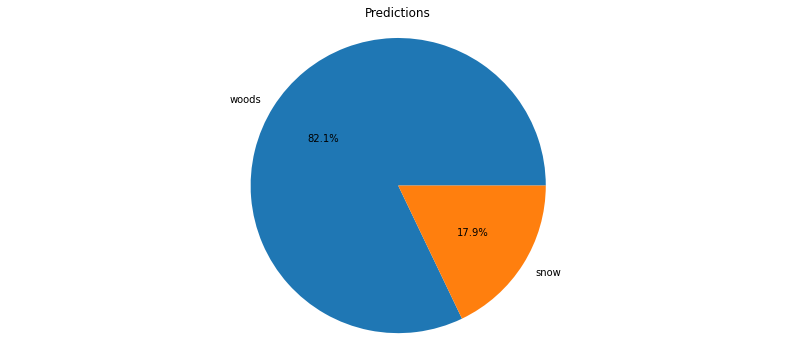

In [23]:
fig,ax=plt.subplots(1,1,figsize=(14,6),num=59)
ax.pie(x=all_pixel_df1['Knn_Preds'].value_counts(),labels = ['woods','snow'],autopct='%1.1f%%')
ax.set_title('Predictions')
ax.axis('equal')

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

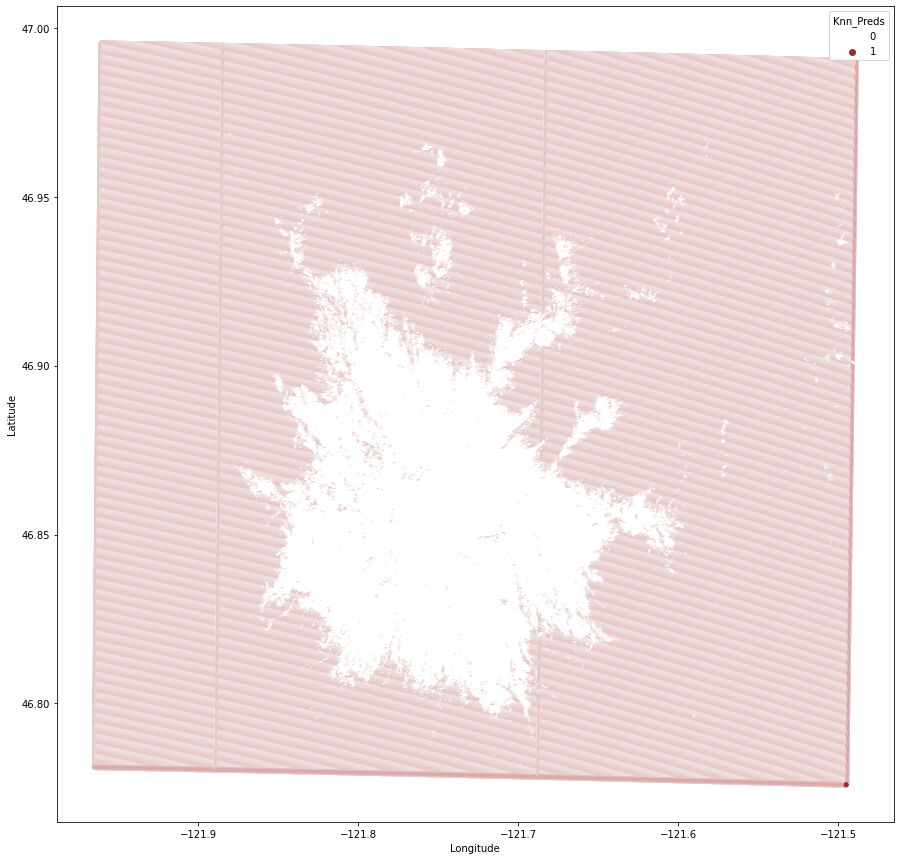

In [24]:
fig, axes = plt.subplots(1,1,figsize = (15,15))
sns.scatterplot(ax=axes,data=all_pixel_df1,x='Longitude',y='Latitude', hue='Knn_Preds',palette=['white','brown'])

In [25]:
svm =  SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)
svm.fit(X_train, y_train)
y_pred1 = svm.predict(X_test1)

In [26]:
print(accuracy_score(y_train, svm.predict(X_train)))
print(accuracy_score(y_test1, y_pred1))

0.9435261707988981
0.9180327868852459


In [27]:
test_df1['Svm_Label_pred']=y_pred1

[Text(0.5, 1.0, 'Predicted')]

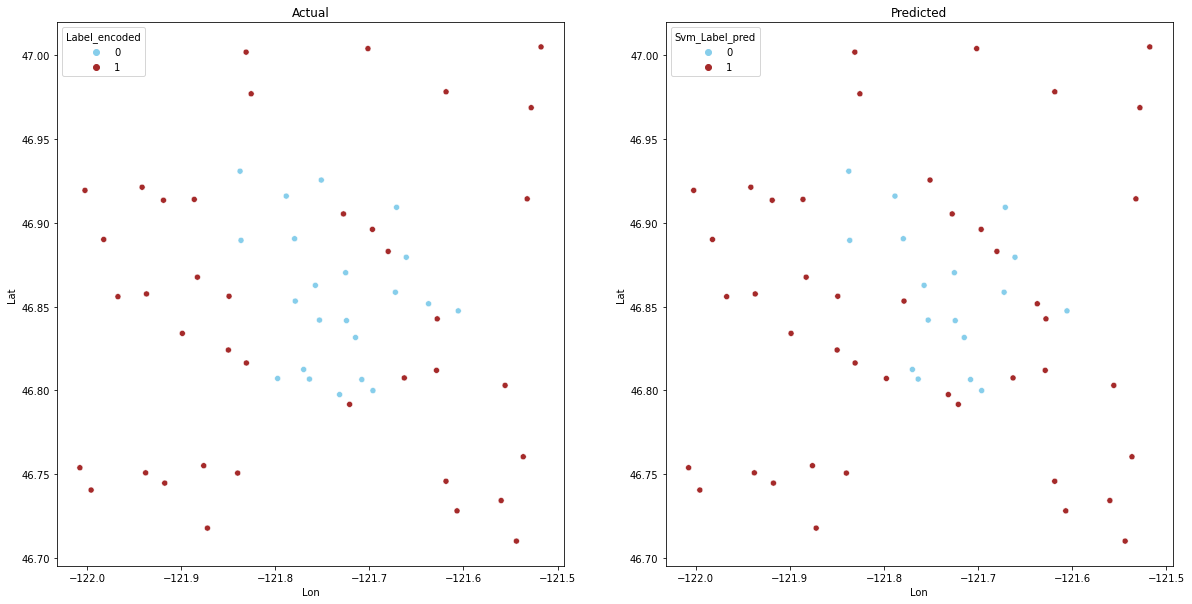

In [28]:
fig, axes = plt.subplots(1,2,figsize = (20,10))
sns.scatterplot(ax=axes[0],data=test_df1,x='Lon',y='Lat', hue='Label_encoded',palette=['skyblue', 'brown']).set(title='Actual')
sns.scatterplot(ax=axes[1],data=test_df1,x='Lon',y='Lat', hue='Svm_Label_pred',palette=['skyblue', 'brown']).set(title='Predicted')

In [29]:
all_pred1 = svm.predict(all_pixel_df1[['radiance_1','radiance_2','radiance_3','radiance_4','radiance_5','radiance_6','radiance_7']])

In [30]:
all_pixel_df1['Svm_Preds']=all_pred1
all_pixel_df1['Svm_Preds'].value_counts()

1    780715
0    170105
Name: Svm_Preds, dtype: int64

(-1.1057578476117393,
 1.1002742017156568,
 -1.1061016879415522,
 1.1040648454570408)

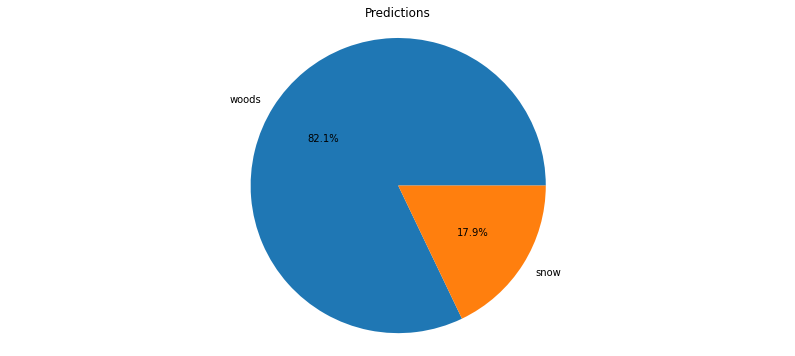

In [31]:
fig,ax=plt.subplots(1,1,figsize=(14,6),num=59)
ax.pie(x=all_pixel_df1['Svm_Preds'].value_counts(),labels = ['woods','snow'],autopct='%1.1f%%')
ax.set_title('Predictions')
ax.axis('equal')

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

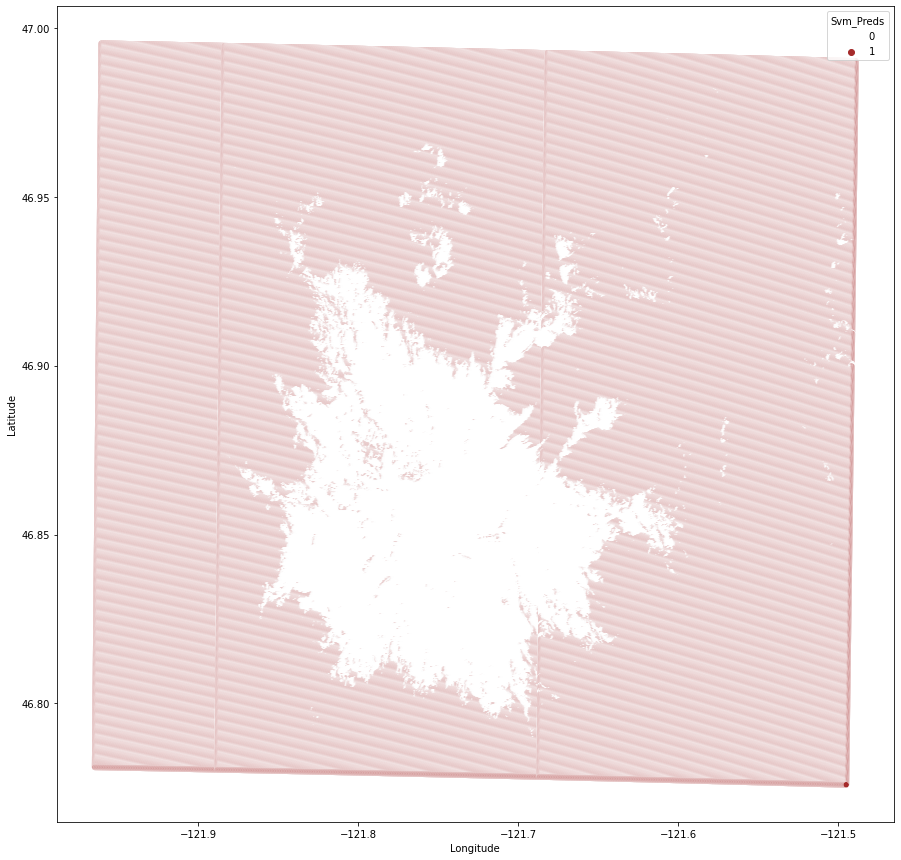

In [32]:
fig, axes = plt.subplots(1,1,figsize = (15,15))
sns.scatterplot(ax=axes,data=all_pixel_df1,x='Longitude',y='Latitude', hue='Svm_Preds',palette=['white', 'brown'])

In [33]:
radiances = ['radiance_1','radiance_2','radiance_3','radiance_4','radiance_5','radiance_6','radiance_7']

In [34]:
all_pixel_df1[['radiance_1','radiance_2','radiance_3','radiance_4','radiance_5','radiance_6','radiance_7','Knn_Preds']].groupby('Knn_Preds').mean()

,radiance_1,radiance_2,radiance_3,radiance_4,radiance_5,radiance_6,radiance_7
Knn_Preds,,,,,,,
0,145.014227,157.529375,130.716534,80.733842,1.244524,6.210013,0.353413
1,29.018625,19.530601,12.424114,24.615175,2.095993,7.244207,0.411764


In [35]:
test_df1[['Svm_Label_pred','knn_Label_pred']]

,Svm_Label_pred,knn_Label_pred
0,0,0
1,0,0
2,1,1
3,1,0
4,1,1
...,...,...
56,1,1
57,1,1
58,1,1
59,1,1


In [36]:
match = np.where(all_pixel_df1.Svm_Preds == all_pixel_df1.Knn_Preds)
len(match[0])

938044

#### Combine LatLon to same feature, find unique points

In [37]:
df['LatLon']=df['Lat'].astype(str)+','+df['Lon'].astype(str)
df

,Lon,Lat,Label,radiance_1,radiance_2,radiance_3,radiance_4,radiance_5,radiance_6,radiance_7,Date,Label_encoded,LatLon
0,-121.838210,46.924327,snow,170.02592,156.46200,119.93402,101.86036,1.67595,5.778555,0.308858,2010-02-17,0,"46.92432718902307,-121.83820979559997"
1,-121.845250,46.890112,snow,129.43694,102.87861,88.61402,55.43130,1.07420,5.169430,0.308858,2010-02-17,0,"46.89011211770983,-121.84524975605648"
2,-121.882736,46.867537,snow,183.04503,165.15121,146.03403,96.60424,1.19455,5.612430,0.243307,2010-02-17,0,"46.86753653047602,-121.88273594637084"
3,-121.849127,46.856135,snow,193.00082,262.18060,233.73003,150.91748,1.55560,5.944680,0.505511,2010-02-17,0,"46.85613464100875,-121.8491268549474"
4,-121.849813,46.824015,snow,193.00082,301.28200,264.00600,175.44604,2.39805,5.889305,0.571062,2010-02-17,0,"46.82401463858567,-121.84981259025795"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,-121.872096,46.717596,woods,58.21474,43.50241,29.10602,42.29100,3.84225,6.332305,0.833266,2011-09-16,1,"46.71759552592864,-121.87209592702176"
722,-121.876032,46.754891,woods,58.21474,42.05421,30.15002,35.28284,2.99980,6.110805,0.767715,2011-09-16,1,"46.75489128693333,-121.87603171664271"
723,-121.556927,46.770262,woods,46.72729,30.46861,19.71002,46.67110,3.60155,7.052180,0.571062,2011-09-16,1,"46.770262235029534,-121.556927154227"
724,-121.721018,46.791530,woods,52.85393,39.15781,25.97402,40.53896,3.72190,6.553805,0.767715,2011-09-16,1,"46.79153021161292,-121.7210184793406"


In [38]:
g = df.groupby('LatLon')
print(g.groups.keys())
print(len(g.groups.keys()))

dict_keys(['46.709837739910654,-121.54374331371976', '46.70983773991238,-121.54374331372112', '46.7098377399141,-121.5437433137225', '46.71759552592864,-121.87209592702176', '46.71759552592904,-121.87209592702216', '46.71759552592941,-121.87209592702251', '46.72790250791558,-121.606861953622', '46.72790250791691,-121.60686195362314', '46.72790250791825,-121.60686195362426', '46.734071520136645,-121.55997567533402', '46.73407152013827,-121.55997567533534', '46.73407152013988,-121.55997567533664', '46.74034558873937,-121.99571779012253', '46.740345588739565,-121.99571779012273', '46.74034558873976,-121.99571779012292', '46.74449184359992,-121.91748560695775', '46.744491843600215,-121.91748560695802', '46.744491843600535,-121.91748560695832', '46.74546564698743,-121.8400948987792', '46.74559330831337,-121.61858144907224', '46.74559330831461,-121.61858144907332', '46.74559330831588,-121.6185814490744', '46.75048189941279,-121.83998727649949', '46.75048189941325,-121.83998727649993', '46.75

# Time Series Analysis

#### Round lat lon points to 5 dec to avoid too many unique points

In [39]:
df_round = df.round({'Lon':5,'Lat':5})
df_round['LatLon']=df_round['Lat'].astype(str)+','+df_round['Lon'].astype(str)
df_round

,Lon,Lat,Label,radiance_1,radiance_2,radiance_3,radiance_4,radiance_5,radiance_6,radiance_7,Date,Label_encoded,LatLon
0,-121.83821,46.92433,snow,170.02592,156.46200,119.93402,101.86036,1.67595,5.778555,0.308858,2010-02-17,0,"46.92433,-121.83821"
1,-121.84525,46.89011,snow,129.43694,102.87861,88.61402,55.43130,1.07420,5.169430,0.308858,2010-02-17,0,"46.89011,-121.84525"
2,-121.88274,46.86754,snow,183.04503,165.15121,146.03403,96.60424,1.19455,5.612430,0.243307,2010-02-17,0,"46.86754,-121.88274"
3,-121.84913,46.85613,snow,193.00082,262.18060,233.73003,150.91748,1.55560,5.944680,0.505511,2010-02-17,0,"46.85613,-121.84913"
4,-121.84981,46.82401,snow,193.00082,301.28200,264.00600,175.44604,2.39805,5.889305,0.571062,2010-02-17,0,"46.82401,-121.84981"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,-121.87210,46.71760,woods,58.21474,43.50241,29.10602,42.29100,3.84225,6.332305,0.833266,2011-09-16,1,"46.7176,-121.8721"
722,-121.87603,46.75489,woods,58.21474,42.05421,30.15002,35.28284,2.99980,6.110805,0.767715,2011-09-16,1,"46.75489,-121.87603"
723,-121.55693,46.77026,woods,46.72729,30.46861,19.71002,46.67110,3.60155,7.052180,0.571062,2011-09-16,1,"46.77026,-121.55693"
724,-121.72102,46.79153,woods,52.85393,39.15781,25.97402,40.53896,3.72190,6.553805,0.767715,2011-09-16,1,"46.79153,-121.72102"


#### Group by coords, predicit each radiance independantly for ea coord

In [40]:
def ts_forecast(ts,rads):
    predictions = pd.DataFrame()
    for rad in rads:
        rdf = ts[[rad,'LatLon','Date']]
        rdf.set_index('Date',inplace = True)
        r_groups = rdf.groupby("LatLon")
        keys = list(r_groups.groups.keys())
        l = []
        for k in keys:
            l.append(len(r_groups.get_group(k)))
        temp = pd.DataFrame()
        temp['Keys']  = keys
        temp['Lengths'] = l
        temp = temp[temp['Lengths'] > 5]
        keys = list(temp['Keys'])
                
        pt = []
        fore = []
        for g in keys:
            point = r_groups.get_group(g)
            r = point[rad]
            adfuller_test = adfuller(r, autolag= "AIC")
            print("ADF test statistic: {}".format(adfuller_test[0]))
            print("p-value: {}".format(adfuller_test[1]))
            model = auto_arima(r, trace=True, error_action='ignore', suppress_warnings=True)
            model.fit(r)
            forecast = model.predict(n_periods=1)
            pt.append(g)
            fore.append(float(forecast))
        predictions['LatLon'] = pt
        predictions[rad] = fore
    
    return predictions

In [ ]:
radiances = ['radiance_1','radiance_2','radiance_3','radiance_4','radiance_5','radiance_6','radiance_7']
ts_preds = ts_forecast(df_round,radiances)

ADF test statistic: -4.863406838889163
p-value: 4.106883115243569e-05
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=101.125, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=102.947, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=102.961, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=134.632, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=104.951, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.993 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -3.8370570819198186
p-value: 0.002550132902760326
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=124.807, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=126.309, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=144.334, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.900 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.864521916129434
p-value: 0.049631898905270096
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=128.762, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=130.723, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=130.698, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=137.839, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.866 seconds
ADF test statistic: -4.13180914830419
p-value: 0.000857687717512605
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=137.836, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=139.059, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=148.410, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.835 seconds
ADF test statistic: -2.325464969652535
p-value: 0.16388648147297324
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=132.944, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=134.580, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=134.488, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=145.004, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.848 seconds
ADF test statistic: -3.416731887714882
p-value: 0.010401536518512536
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=119.182, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=119.576, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=134.484, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.964 seconds
ADF test statistic: -1.4023247688124758
p-value: 0.5811610890458557
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=129.074, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=130.688, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=130.403, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=138.554, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.077 seconds
ADF test statistic: -3.3784001306721696
p-value: 0.011717621565457807
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=128.578, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=130.396, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=130.269, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=138.672, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=132.118, Time=0.16 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.746 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.3571011737678234
p-value: 0.1542120113335274
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=132.198, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=132.821, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=142.143, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.977 seconds
ADF test statistic: -3.63805066727102
p-value: 0.005073889361172366
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=137.908, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=139.718, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=139.438, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=149.182, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.129 seconds
ADF test statistic: -2.6151456168357035
p-value: 0.0899072047730235
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=139.089, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=140.388, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=139.771, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=149.500, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.006 seconds
ADF test statistic: -3.865127090827283
p-value: 0.0023070211104271377
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=104.793, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=106.312, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=129.047, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.966 seconds
ADF test statistic: -3.6986265761000205
p-value: 0.004132514101354284
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=106.934, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=108.645, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=108.633, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=131.179, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.975 seconds
ADF test statistic: -3.4208929612826435
p-value: 0.010266920294984631
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=91.293, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=91.892, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=100.244, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.568 seconds
ADF test statistic: -4.707594449522604
p-value: 8.143143067002959e-05
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=85.947, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=87.662, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=86.064, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=105.847, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=89.877, Time=0.36 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=nan, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=87.782, Time=0.09 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.23 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 2.109 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.6457513110645903
p-value: 0.08390517730599434
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=89.180, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=90.986, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=107.894, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.339 seconds
ADF test statistic: -2.6457513110645903
p-value: 0.08390517730599434
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=80.925, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=82.732, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=108.159, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.435 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -4.263917139961799
p-value: 0.0005126530486431237
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=107.251, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=100.954, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=102.910, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=102.618, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=120.302, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=104.942, Time=0.21 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.840 seconds
ADF test statistic: -2.6457513110645903
p-value: 0.08390517730599434
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=69.698, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=71.505, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=108.488, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.380 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.281551983202399
p-value: 0.1779868683148242
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=115.756, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=117.287, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=117.013, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=147.543, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=118.919, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.846 seconds
ADF test statistic: -2.4298623299189193
p-value: 0.13348473855781634
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=102.919, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=103.290, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=102.331, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=101.541, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=117.708, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=106.558, Time=0.40 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=112.964, Time=0.08 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.307 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -7.335969068352006
p-value: 1.0963649715195156e-10
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=83.795, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=85.476, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=134.856, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.965 seconds
ADF test statistic: -4.65756745539768
p-value: 0.00010103306961361702
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=112.045, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=112.008, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=109.616, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=130.539, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=111.609, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.484 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.0065985683724965
p-value: 0.2836873728325471
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=114.679, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=115.732, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=115.292, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=131.545, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=117.282, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.840 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/home/arielharris/.local/lib/python3.8/site-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: nan
p-value: nan
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=162.359, Time=0.02 sec
Total fit time: 0.053 seconds
ADF test statistic: -2.810363726019816
p-value: 0.05680856516037968
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=117.597, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=111.323, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=113.317, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=113.312, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=123.278, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.935 seconds
ADF test statistic: -1.0000000000000002
p-value: 0.7532643012005653
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=12.073, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-0.429, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1.562, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=175.715, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5.004, Time=0.20 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.970 seconds
ADF test statistic: nan
p-value: nan
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=175.722, Time=0.02 sec
Total fit time: 0.027 seconds
ADF test statistic: 1.8510065315728848
p-value: 0.998444991437126
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/home/arielharris/.local/lib/python3.8/site-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=93.541, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=94.390, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=93.178, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=105.560, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=nan, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.897 seconds
ADF test statistic: -2.6457513110645903
p-value: 0.08390517730599434
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=85.630, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=87.437, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=107.999, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.429 seconds
ADF test statistic: -1.9753657974333536
p-value: 0.29747767838586614
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=89.910, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=86.993, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=88.597, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=88.081, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=106.996, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.461 seconds
ADF test statistic: -2.3185267772340152
p-value: 0.16606231792403392
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=108.931, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=110.907, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=110.853, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=126.429, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.805 seconds
ADF test statistic: -3.4889837334549503
p-value: 0.008274563693763197
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=89.258, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=91.105, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=91.128, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=124.831, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=92.390, Time=0.24 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.927 seconds
ADF test statistic: -1.5414934247057934
p-value: 0.5128944810404189
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=112.382, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=111.793, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=111.765, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=132.733, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=113.356, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=126.792, Time=0.09 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.678 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.2687641890635635
p-value: 0.18224008165288358
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=95.018, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=97.017, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=97.017, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=124.380, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=99.018, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.772 seconds
ADF test statistic: -2.0918878302981887
p-value: 0.24778903246990114
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=112.342, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=121.433, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=121.960, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=120.047, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=140.298, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=116.164, Time=0.31 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=122.037, Time=0.15 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=111.963, Time=0.36 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=112.733, Time=0.30 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=117.010, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.34 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0] intercept


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.1061814980185396
p-value: 0.24203626600494316
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=127.383, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=128.188, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=127.681, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=141.453, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=129.672, Time=0.17 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.939 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -3.2183417679643536
p-value: 0.018947233245067592
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=103.038, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=104.246, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=104.465, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=174.969, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=105.916, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.584 seconds
ADF test statistic: -2.631925622305929
p-value: 0.08657675861714514
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=91.000, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=92.966, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=92.926, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=103.778, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.365 seconds
ADF test statistic: -10.529281217628904
p-value: 9.24166893694788e-19
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=115.202, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=116.256, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=116.010, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=131.294, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=117.915, Time=0.16 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.996 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.0101690130045293
p-value: 0.28213221815174305
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=104.570, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=105.767, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=116.252, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.506 seconds
ADF test statistic: -4.896625388675526
p-value: 3.540568580558333e-05
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=120.701, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=114.871, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=114.772, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=115.221, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=139.140, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=116.702, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=116.709, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=118.705, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=128.345, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.136 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -1.9503241783070817
p-value: 0.3087696070286343
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=123.414, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=124.082, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=124.077, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=141.998, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=125.971, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.815 seconds
ADF test statistic: -2.312098518754299
p-value: 0.16809564357741286
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=121.274, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=120.132, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=118.839, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=145.877, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=120.490, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=119.937, Time=0.27 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.480 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -8.947562397643159
p-value: 8.903051876510406e-15
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=102.771, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=101.062, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=101.076, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=101.154, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=119.390, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.465 seconds
ADF test statistic: -4.261807389769274
p-value: 0.0005169477844334837
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=134.910, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=135.717, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=135.260, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=149.270, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=137.254, Time=0.24 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.984 seconds
ADF test statistic: -6.885128907707242
p-value: 1.4009212132689787e-09
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=107.232, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=104.348, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=105.605, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=105.262, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=117.841, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.536 seconds
ADF test statistic: -2.7222100124152493
p-value: 0.07027318819229027
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=97.247, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=99.201, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=99.208, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=125.670, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=101.195, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.841 seconds
ADF test statistic: -3.0279571761738047
p-value: 0.032364758440840656
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=129.074, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=131.074, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=131.074, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=137.113, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.753 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -8.584028206815349
p-value: 7.592392516232382e-14
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=134.455, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=129.165, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=130.971, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=130.891, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=136.622, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=132.787, Time=0.17 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.811 seconds
ADF test statistic: -3.200085909499727
p-value: 0.01997970697800403
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=125.361, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=117.518, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=119.369, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=119.372, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=147.607, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=121.330, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.789 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -3.0238201595740315
p-value: 0.03272898533614406
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=128.604, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=130.563, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=130.544, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=137.137, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.783 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -3.5094202102480603
p-value: 0.007748433456514686
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=135.654, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=129.521, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=131.293, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=131.130, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=138.380, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=131.216, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.807 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -1.658775789787989
p-value: 0.4524677062162816
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=124.248, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=123.013, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=122.265, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=141.711, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=123.978, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.528 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -3.178619341436607
p-value: 0.021256114053259702
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=134.999, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=136.948, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=149.234, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.120 seconds
ADF test statistic: -3.768155805430478
p-value: 0.0032504530828393655
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=139.774, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=141.461, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=150.632, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=140.545, Time=0.30 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.146 seconds
ADF test statistic: -1.224124827313052
p-value: 0.6631326884701616
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=107.751, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=109.148, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=108.880, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=128.861, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.001 seconds
ADF test statistic: -4.169077815860781
p-value: 0.000742975225158183
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=108.470, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=109.087, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=120.812, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.040 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.968494604790508
p-value: 0.03794320459520312
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=121.610, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=123.466, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=123.292, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=135.668, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=122.568, Time=0.29 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.978 seconds
ADF test statistic: -1.1792369971826557
p-value: 0.6824630590546451
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=134.055, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=129.022, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=130.943, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=130.711, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=139.930, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=132.973, Time=0.22 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.855 seconds
ADF test statistic: 0.8632685458322307
p-value: 0.9925917511573452
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=96.999, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=95.973, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=126.277, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=97.498, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=97.538, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=99.532, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=110.494, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.255 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -3.8699380674041692
p-value: 0.0022675695991045005
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=98.803, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=100.672, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=100.684, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=124.573, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=102.671, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.746 seconds
ADF test statistic: -3.701169914318874
p-value: 0.004096728308473838
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=122.010, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=123.332, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=137.834, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=125.908, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.805 seconds
ADF test statistic: -3.063069984683116
p-value: 0.029409654850255415
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=142.887, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=144.885, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=144.883, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=145.295, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.869 seconds
ADF test statistic: -4.0451353989688865
p-value: 0.0011917624417505173
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=137.772, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=139.109, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=144.462, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.768 seconds
ADF test statistic: -2.224395415201332
p-value: 0.1975107571183875
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=129.472, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=131.154, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=131.094, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=138.523, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.925 seconds
ADF test statistic: -12.485755926776992
p-value: 3.0213445790619487e-23
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=119.021, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=119.172, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=129.425, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.923 seconds
ADF test statistic: -2.6398817731774735
p-value: 0.08503142666691493
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=130.758, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=132.546, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=132.408, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=136.441, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.829 seconds
ADF test statistic: -3.8839793761134187
p-value: 0.0021559652232701534
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=127.739, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=129.561, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=129.424, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=134.358, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=131.242, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.759 seconds
ADF test statistic: -2.5155099101553766
p-value: 0.11174605830761963
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=150.350, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=143.418, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=145.033, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=144.812, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=147.334, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.907 seconds
ADF test statistic: -3.5627594181854443
p-value: 0.006514224258096897
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=135.502, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=137.371, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=137.206, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=144.031, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.893 seconds
ADF test statistic: -2.8650416954373954
p-value: 0.04956681273305103
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=152.144, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=153.998, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=153.925, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=155.348, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.968 seconds
ADF test statistic: -3.9250091206324362
p-value: 0.0018583117240801186
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=109.606, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=102.855, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=104.336, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=122.914, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.901 seconds
ADF test statistic: -3.5006989289236987
p-value: 0.007969162219188341
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=105.296, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=107.173, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=107.181, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=124.748, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=109.169, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.575 seconds
ADF test statistic: -3.480254305812304
p-value: 0.008508924674881482
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=97.793, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=95.334, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=95.930, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=95.986, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=100.390, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.447 seconds
ADF test statistic: -5.804109589633951
p-value: 4.558731278779233e-07
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=93.117, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=89.598, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=106.285, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=90.993, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=102.793, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.043 seconds
ADF test statistic: -1.6679450363864172
p-value: 0.4476991984070746
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=101.258, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=103.243, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=103.237, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=115.646, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.358 seconds
ADF test statistic: -3.479606911157304
p-value: 0.00852654057944761
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=99.368, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=98.169, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=98.624, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=115.183, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.497 seconds
ADF test statistic: -0.7809838309868463
p-value: 0.8246442070855001
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=109.298, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=99.751, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=101.721, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=101.405, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=114.129, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=103.716, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.800 seconds
ADF test statistic: -1.6959943429672806
p-value: 0.43317748470192735


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=99.448, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=96.414, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=97.335, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=113.708, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.412 seconds
ADF test statistic: -1.7110568356964881
p-value: 0.42542485521838513
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=135.187, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=137.150, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=156.842, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.836 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -3.54559178219632
p-value: 0.006890555792767297
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=114.105, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=110.555, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=112.220, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=112.104, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=119.788, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.395 seconds
ADF test statistic: -3.311729143411355
p-value: 0.01436225336298412
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=121.247, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=122.851, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=142.730, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.785 seconds
ADF test statistic: -9.088766309902445
p-value: 3.875241672379718e-15
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=108.911, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=108.950, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=124.718, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.787 seconds
ADF test statistic: -2.1478848705150626
p-value: 0.22570058737960103
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=128.766, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=130.766, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=130.766, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=139.847, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.940 seconds
ADF test statistic: -3.4089396330430675
p-value: 0.010657869115305802
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=139.256, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=140.744, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=140.833, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=174.103, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=142.724, Time=0.19 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.797 seconds
ADF test statistic: -2.794473296332274
p-value: 0.0590675653225491
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=108.634, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=110.625, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=110.619, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=117.993, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=112.634, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.807 seconds
ADF test statistic: -2.144821795521256
p-value: 0.22687743409867933
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=146.315, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=147.668, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=147.804, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=184.854, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=149.890, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.838 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -8.359065323502213
p-value: 2.8561683758267186e-13
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=142.776, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=144.130, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=143.683, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=190.664, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=146.246, Time=0.32 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.097 seconds
ADF test statistic: -1.4127159522414852
p-value: 0.5761649775681607
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=106.232, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=102.562, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=104.270, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=104.235, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=110.659, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.537 seconds
ADF test statistic: -1.7441895475350129
p-value: 0.40850042765637246
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=98.122, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=100.106, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=100.085, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=113.815, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.374 seconds
ADF test statistic: -23.2266305483848
p-value: 0.0
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=99.655, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=95.971, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=97.953, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=97.914, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=108.375, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.482 seconds
ADF test statistic: -2.3850304237870117
p-value: 0.1460061118851344
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=106.216, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=108.203, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=108.181, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=122.822, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.833 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -0.49437331083624453
p-value: 0.8931098381043543
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=82.991, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=84.625, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=84.691, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=116.308, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.869 seconds
ADF test statistic: -1.6257569512368706
p-value: 0.46971246378946574
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=124.884, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=124.585, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=124.499, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=139.488, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=126.383, Time=0.17 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=133.690, Time=0.10 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.435 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -3.6213286753561387
p-value: 0.0053661196532977865
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=92.138, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=94.136, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=94.135, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=114.248, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=96.136, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.724 seconds
ADF test statistic: -3.438772510208582
p-value: 0.009706028349063724
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=130.212, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=131.882, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=131.399, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=141.133, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=133.300, Time=0.18 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.903 seconds
ADF test statistic: -1.9730539284589137
p-value: 0.2985115302079704
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=135.612, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=137.309, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=137.015, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=144.575, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.866 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.6131911788324733
p-value: 0.09030145219018126
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=147.430, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=149.387, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=149.380, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=180.882, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=151.288, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.814 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.635047045598546
p-value: 0.08596790662254045
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=92.576, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=89.014, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=90.960, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=90.909, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=98.186, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.386 seconds
ADF test statistic: -12.83838103583858
p-value: 5.675960193596746e-24
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=130.389, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=131.601, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=131.326, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=141.154, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=133.282, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.878 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -4.317014669280746
p-value: 0.0004150217686538398
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=116.583, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=112.700, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=114.608, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=114.590, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=119.154, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.544 seconds
ADF test statistic: -4.784916714130469
p-value: 5.811679689075821e-05
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=113.900, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=114.059, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=114.403, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=132.535, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=116.007, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.698 seconds
ADF test statistic: -1.7843883008814625
p-value: 0.3882395496028746
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=134.859, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=135.417, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=132.765, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=145.322, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=134.664, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.527 seconds
ADF test statistic: -2.6541360610088556
p-value: 0.08231648584302614
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=135.734, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=133.417, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=150.253, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=130.604, Time=0.18 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=137.657, Time=0.34 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=135.926, Time=0.08 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 2.119 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -5.135772896283233
p-value: 1.1873697939125611e-05
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=117.878, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=115.871, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=116.342, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=116.030, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=128.259, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.385 seconds
ADF test statistic: -2.4245169096021884
p-value: 0.134935910395945
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=143.524, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=145.252, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=145.154, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=151.415, Time=0.03 sec


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=147.121, Time=0.18 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.812 seconds
ADF test statistic: -5.2247032022097795
p-value: 7.82648096564189e-06
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=111.997, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=110.305, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=111.252, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=110.048, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=120.852, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=115.728, Time=0.07 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.170 seconds
ADF test statistic: -2.0429481472500206
p-value: 0.26806492818191174
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=95.428, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=97.388, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=97.392, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=118.212, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=99.384, Time=0.16 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.792 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -3.0990502617979807
p-value: 0.0266235532457167
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=138.345, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=140.338, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=140.335, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=140.857, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.013 seconds
ADF test statistic: -3.805740352193366
p-value: 0.002849126712638795
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=147.339, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=149.339, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=149.339, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=148.417, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.796 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -1.9689106584647609
p-value: 0.3003688056151188
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=132.916, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=131.622, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=132.331, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=152.850, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=133.632, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=133.621, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=135.516, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=134.728, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.218 seconds
ADF test statistic: -3.2367238756605383
p-value: 0.017954966408426812
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=138.947, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=140.894, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=140.872, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=142.084, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.886 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -3.4988316985005903
p-value: 0.008017149262040875
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=129.881, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=131.662, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=131.508, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=135.955, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=131.661, Time=0.18 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.820 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -1.7980102125391952
p-value: 0.3814500143922133
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=127.846, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=127.727, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=127.378, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=142.065, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.519 seconds
ADF test statistic: -2.0787045817660474
p-value: 0.25316335500476017
Performing stepwise search to minimize aic

/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(



 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=144.729, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=146.709, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=146.669, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=152.060, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.082 seconds
ADF test statistic: -3.5847532636770545
p-value: 0.006059292452385403
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=157.970, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=159.795, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=159.678, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=160.724, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.917 seconds
ADF test statistic: -1.0130794740021625
p-value: 0.7484640213099037
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=110.409, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=104.516, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=105.787, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=105.496, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=121.479, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.883 seconds
ADF test statistic: -4.086442219236474
p-value: 0.0010197263079131684
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=107.665, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=108.433, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=115.530, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.889 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -3.510304662952919
p-value: 0.007726358909263757
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=118.003, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=119.803, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=130.376, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.047 seconds
ADF test statistic: -2.374812811133129
p-value: 0.14897184925480655
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=137.496, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=139.443, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=139.371, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=142.354, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.857 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: 3.4718475512322464
p-value: 1.0
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=92.421, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=92.176, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=92.381, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=117.596, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=94.058, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=94.098, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=96.139, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=104.847, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.125 seconds
ADF test statistic: -3.583191553674705
p-value: 0.006090620316415894
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=91.370, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=93.281, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=93.293, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=113.259, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=95.278, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.734 seconds
ADF test statistic: -3.1980138679066092
p-value: 0.020099932568283057
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=118.434, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=119.502, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=130.561, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=122.245, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.755 seconds
ADF test statistic: -3.0542810902429034
p-value: 0.03012685853736176
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=139.510, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=141.508, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=141.506, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=140.854, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.967 seconds
ADF test statistic: -3.8835710818470166
p-value: 0.0021591374104703814
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=135.561, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=137.096, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=136.809, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=139.423, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.905 seconds
ADF test statistic: -2.9707849687895105
p-value: 0.03771426228772943
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=125.732, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=127.246, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=127.189, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=131.310, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.950 seconds
ADF test statistic: -3.836851406137071
p-value: 0.0025519984097328308
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=117.215, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=117.530, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=124.127, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.969 seconds
ADF test statistic: -1.4110634948131637
p-value: 0.5769607977215729
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=127.291, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=129.047, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=128.870, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=130.976, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.925 seconds
ADF test statistic: -7.997667042872246
p-value: 2.3800904586534055e-12
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=125.339, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=127.139, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=126.979, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=129.744, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=128.775, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.828 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.524900408935864
p-value: 0.10953273062162006
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=139.592, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=141.220, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=141.038, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=142.827, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.910 seconds
ADF test statistic: -3.650543094573356
p-value: 0.004865107000456728
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=131.138, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=132.923, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=137.334, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.837 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.8791989889668583
p-value: 0.04782089314955836
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=155.945, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=149.283, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=151.154, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=151.089, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=151.245, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.877 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -3.3089719317861994
p-value: 0.014482161316654333
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=102.867, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=104.812, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=104.780, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=115.581, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.961 seconds
ADF test statistic: -3.122058534652432
p-value: 0.02496324408444707
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=103.343, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=105.342, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=105.342, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=117.452, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=107.338, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.726 seconds
ADF test statistic: -3.5604867470283144
p-value: 0.006562952359686729
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=95.466, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=93.113, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=93.569, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=97.310, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.449 seconds
ADF test statistic: -31.077401981583687
p-value: 0.0
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=90.992, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=86.563, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=103.220, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=87.704, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=100.474, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.092 seconds
ADF test statistic: -2.0778446156119426
p-value: 0.2535161970009755
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=96.532, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=98.486, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=98.461, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=111.812, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.456 seconds
ADF test statistic: -3.6083977031966796
p-value: 0.005602496369377709
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=93.814, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=92.855, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=93.136, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=111.544, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.538 seconds
ADF test statistic: -5.139229503135723
p-value: 1.1684099044186381e-05
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=103.678, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=96.224, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=98.194, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=107.110, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=100.171, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.096 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -3.1102170113280105
p-value: 0.025806265377198642
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=92.699, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=89.311, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=90.468, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=110.143, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.396 seconds
ADF test statistic: -1.1414002294688066
p-value: 0.6982829003627433
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=128.913, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=130.688, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=152.346, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.828 seconds
ADF test statistic: -3.6126744346368005
p-value: 0.005523291924917877


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=110.652, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=107.369, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=108.780, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=108.665, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=116.721, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.430 seconds
ADF test statistic: -3.48968625777215
p-value: 0.008255957423960753
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=115.295, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=117.254, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=138.757, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.966 seconds
ADF test statistic: -9.447107845667079
p-value: 4.72318822381908e-16
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=105.474, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=104.722, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=118.903, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=99.202, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=100.409, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=102.293, Time=0.41 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=105.577, Time=0.06 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 2.029 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -1.7592379185070923
p-value: 0.40087834454336446
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=125.019, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=126.989, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=126.972, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=136.022, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.015 seconds
ADF test statistic: -3.0679514398983976
p-value: 0.029017641967287122
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=123.818, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=125.785, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=125.791, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=167.961, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=126.436, Time=0.25 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.911 seconds
ADF test statistic: -2.904085169918828
p-value: 0.04487500597354536
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=112.677, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=105.851, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=107.849, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=107.847, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=112.251, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.030 seconds
ADF test statistic: -3.5163290807765955
p-value: 0.007577499274427809
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=137.621, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=136.185, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=137.121, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=137.383, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=180.031, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=139.433, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.855 seconds
ADF test statistic: -3.521563846356954
p-value: 0.007450254676569573
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=128.228, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=130.082, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=130.025, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=183.034, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=132.170, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.932 seconds
ADF test statistic: -1.52816693256416
p-value: 0.5195344129744681
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=103.419, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=99.778, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=101.473, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=101.419, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=107.826, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.532 seconds
ADF test statistic: -2.38684467457907
p-value: 0.14548387909207255
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=93.939, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=95.938, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=95.935, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=111.009, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.388 seconds
ADF test statistic: -236.5820275229819
p-value: 0.0
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=92.475, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=94.428, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=94.293, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=105.633, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.514 seconds
ADF test statistic: -2.5316641954648733
p-value: 0.1079589136152253
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=101.922, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=103.922, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=103.922, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=119.003, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.860 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -1.5124470674516577
p-value: 0.5273452129214111
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=78.882, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=80.151, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=104.235, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.849 seconds
ADF test statistic: -1.611907975932628
p-value: 0.4769741027443026
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=138.005, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=121.397, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=120.902, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=120.873, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=136.391, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=122.566, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=131.162, Time=0.08 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.458 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: 7.76026621470837
p-value: 1.0
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=85.394, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=87.257, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=87.239, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=102.973, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=89.268, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.735 seconds
ADF test statistic: -3.3201170108791755
p-value: 0.014002844488570589
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=136.201, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=126.992, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=128.663, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=128.187, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=136.876, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=130.085, Time=0.16 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.936 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.1306293059207237
p-value: 0.23237805639869852
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=130.331, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=131.705, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=131.053, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=139.858, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.881 seconds
ADF test statistic: -3.3383256312003082
p-value: 0.01324985506851032
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=138.915, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=140.880, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=140.876, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=176.682, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=142.549, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.650 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.551214342079931
p-value: 0.10350518470658465
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=86.057, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=88.026, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=88.004, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=93.486, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.396 seconds
ADF test statistic: -12.487978887006662
p-value: 2.9890340850160056e-23
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=124.544, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=125.540, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=125.206, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=136.086, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=127.103, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.831 seconds
ADF test statistic: -3.8334344947182872
p-value: 0.002583175036738481
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=111.165, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=107.423, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=109.203, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=109.166, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=114.813, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.510 seconds
ADF test statistic: -4.504960278941603
p-value: 0.00019262132792087237
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=114.212, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=114.822, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=114.909, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=124.766, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=116.804, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.738 seconds
ADF test statistic: -1.9387312989525967
p-value: 0.3140656761012576
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=129.116, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=129.278, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=127.132, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=140.503, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=129.099, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=133.222, Time=0.06 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.288 seconds
ADF test statistic: -1.7018279544607475
p-value: 0.430170906691886
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=131.186, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=128.028, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=146.122, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=120.498, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=122.196, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=124.302, Time=0.36 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=128.755, Time=0.06 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 1.916 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -4.908357835127094
p-value: 3.359125691282775e-05
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=111.157, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=109.754, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=109.827, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=109.379, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=123.561, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.077 seconds
ADF test statistic: -2.5561139745710313
p-value: 0.1024110138760102
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=139.687, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=141.412, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=141.311, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=147.077, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=143.275, Time=0.19 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.824 seconds
ADF test statistic: -4.926820168628366
p-value: 3.0915935546645034e-05
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=109.189, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=107.923, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=108.765, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=107.263, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=118.594, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.186 seconds
ADF test statistic: -2.9182765659998804
p-value: 0.04326358758191229
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=89.494, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=91.482, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=91.480, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=108.198, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=93.465, Time=0.17 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.698 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -3.1054279770347524
p-value: 0.02615409297911295
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=135.539, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=137.529, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=137.525, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=136.777, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.878 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -5.676989723776583
p-value: 8.659171050256444e-07
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=146.619, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=139.906, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=141.901, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=141.900, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=140.514, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.954 seconds
ADF test statistic: -1.3628028542729222
p-value: 0.5999733572580483
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=126.679, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=125.467, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=126.404, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=149.015, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=127.464, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=127.466, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=129.387, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=128.817, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.361 seconds
ADF test statistic: -4.469212315560784
p-value: 0.0002234228903213672
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=136.685, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=138.618, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=138.592, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=138.201, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.766 seconds
ADF test statistic: -3.517596121236958
p-value: 0.007546522253582546
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=127.015, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=128.765, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=128.582, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=130.830, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=128.806, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.655 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -1.7196185860262427
p-value: 0.42103378916560014
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=124.359, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=123.925, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=123.655, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=138.372, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=125.622, Time=0.17 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=125.628, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.368 seconds
ADF test statistic: -3.1450521990802582
p-value: 0.023393846234922407
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=139.942, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=141.915, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=141.854, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=147.075, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.024 seconds
ADF test statistic: -3.6273131233976046
p-value: 0.005259823227309071
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=149.866, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=151.657, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=151.486, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=152.438, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.017 seconds
ADF test statistic: -0.9653677848490548
p-value: 0.7656851681566876
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=99.832, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=100.993, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=100.653, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=112.802, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.889 seconds
ADF test statistic: -3.910522436601164
p-value: 0.0019587581137919924
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=104.719, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=105.728, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=109.525, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.041 seconds
ADF test statistic: -3.7917906692114536
p-value: 0.0029924328459501816
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=121.969, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=115.308, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=117.071, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=124.165, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.412 seconds
ADF test statistic: -0.9489184484558882
p-value: 0.7714365408694823
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=134.581, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=136.520, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=136.438, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=137.999, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.992 seconds
ADF test statistic: 18.698852898015502
p-value: 1.0
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=92.509, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=89.479, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=88.463, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=88.669, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=108.752, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=90.270, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=90.323, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=91.675, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=101.539, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.342 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -5.269974310152656
p-value: 6.316818927186039e-06
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=112.829, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=113.028, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=112.824, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=129.170, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=114.741, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=114.372, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=116.366, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=122.309, Time=0.06 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.308 seconds
ADF test statistic: -6.579124391552927
p-value: 7.59227679425937e-09
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=113.344, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=115.202, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=114.749, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=138.037, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=115.403, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.619 seconds
ADF test statistic: -2.8885967226440754
p-value: 0.0466902036700712
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=130.587, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=132.557, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=132.545, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=137.831, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.978 seconds
ADF test statistic: -4.362093963340186
p-value: 0.00034619802774644304
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=123.433, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=123.277, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=140.942, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=122.193, Time=0.24 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=123.375, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=123.783, Time=0.43 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=134.358, Time=0.09 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 2.178 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -4.787066506091837
p-value: 5.75704269725978e-05
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=123.717, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=125.674, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=125.672, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=142.258, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=127.716, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.966 seconds
ADF test statistic: -6.3742288831885405
p-value: 2.3049134281527636e-08
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=107.176, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=108.132, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=129.889, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=110.787, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.688 seconds
ADF test statistic: -1.8848249712247542
p-value: 0.3392332506990426
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=115.187, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=116.202, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=115.407, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=130.161, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.009 seconds
ADF test statistic: -1.549833238182483
p-value: 0.5087314947318192
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=121.154, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=122.608, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=122.259, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=130.423, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=124.109, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.703 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.5721677388923183
p-value: 0.09888714179084618
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=133.584, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=135.292, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=135.122, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=140.963, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.678 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -5.410933573522371
p-value: 3.212626270692995e-06
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=131.309, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=130.852, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=130.834, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=149.764, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=132.543, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=128.288, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.10 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 2.009 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.7509686610966773
p-value: 0.0656260368784713
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=139.356, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=141.024, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=140.837, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=144.995, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.801 seconds
ADF test statistic: -17.35497447971235
p-value: 5.244346490222246e-30
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=95.020, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=96.988, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=96.973, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=126.790, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.925 seconds
ADF test statistic: -3.4022346115772826
p-value: 0.010882929327391256
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=96.239, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=98.235, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=98.235, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=126.479, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.144 seconds
ADF test statistic: -4.421296393297857
p-value: 0.0002721055008451887
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=84.992, Time=0.12 sec


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=83.953, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=83.024, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=92.068, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=84.966, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=91.458, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.005 seconds
ADF test statistic: -1.017491253125176
p-value: 0.746831431334293
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=81.760, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=82.718, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=79.786, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=98.230, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=81.758, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,0)(0,0,0)[0]             : AIC=92.645, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.923 seconds
ADF test statistic: -2.8038086059149108
p-value: 0.057731791930299994
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=92.992, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=89.004, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=91.003, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=107.032, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.428 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -4.283953262666579
p-value: 0.0004735097586808523
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=89.035, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=88.198, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=106.306, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=90.101, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=92.152, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=99.715, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.118 seconds
ADF test statistic: -1.7278887948543171
p-value: 0.4168036255218458
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=100.267, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=94.273, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=96.256, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=96.255, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=114.277, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=98.263, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.846 seconds
ADF test statistic: -3.1485130984913794
p-value: 0.023165165606769914
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=89.793, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=86.659, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=87.152, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=104.318, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.499 seconds
ADF test statistic: -1.1770717310348109
p-value: 0.683380301498393
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=122.469, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=124.464, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=124.456, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=145.527, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.940 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -4.140683748359754
p-value: 0.0008289553540250791
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=99.101, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=95.378, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=97.117, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=97.111, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=111.234, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.453 seconds
ADF test statistic: -3.8476206284600067
p-value: 0.0024559949140042954
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=111.016, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=112.453, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=132.269, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.926 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -6.023551904738611
p-value: 1.4741511533024112e-07
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=98.331, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=95.728, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=96.312, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=96.089, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=109.202, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=98.069, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.870 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.8341126281894606
p-value: 0.05356381231272057
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=114.207, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=115.818, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=130.274, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.911 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -5.460829468484105
p-value: 2.52090239818946e-06
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=127.875, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=129.524, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=129.617, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=161.074, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=130.332, Time=0.24 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.932 seconds
ADF test statistic: -2.4705976272829724
p-value: 0.1227931023407165
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=108.768, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=102.534, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=104.238, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=104.111, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=116.495, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.943 seconds
ADF test statistic: -3.922466002957391
p-value: 0.0018755919010946178
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=129.440, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=134.695, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=135.316, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=135.596, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=169.917, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=124.904, Time=0.46 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=124.718, Time=0.38 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=129.796, Time=0.27 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=122.114, Time=0.43 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=127.218, Time=0.40 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=139.593, Time=0.40 sec

Best model:  ARIMA(4,0,1)(0,0,0)[0] intercept
Total fit time: 4.116 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.9092022444911834
p-value: 0.04428831875650456
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=131.774, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=133.777, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=133.772, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=176.477, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=135.772, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.764 seconds
ADF test statistic: -2.525587086447181
p-value: 0.10937217526917026
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=89.858, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=91.730, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=91.745, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=103.878, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.529 seconds
ADF test statistic: -1.6965798323989838
p-value: 0.43287550609751735
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=86.104, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=87.983, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=87.901, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=106.332, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.540 seconds
ADF test statistic: -1.838258388747984
p-value: 0.36163960805354856
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=85.826, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=82.277, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=84.233, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=84.130, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=99.785, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.538 seconds
ADF test statistic: -2.8037404484217108
p-value: 0.05774145486900631
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=93.802, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=95.734, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=95.650, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=110.996, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.806 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -3.0141424938470567
p-value: 0.03359461114550763
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=102.569, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=102.549, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=102.237, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=129.966, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=104.124, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.290 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -1.697089371391015
p-value: 0.4326127408332793
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=112.888, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=113.039, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=112.917, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=128.889, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=114.790, Time=0.16 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.856 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -6.217418084800363
p-value: 5.323927368357428e-08
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=101.195, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=102.292, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=102.167, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=114.431, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=104.157, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.760 seconds
ADF test statistic: -2.0236970197510007
p-value: 0.2762803994840495
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=117.404, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=118.944, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=118.279, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=126.786, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=120.194, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.849 seconds
ADF test statistic: -2.1413107954244004
p-value: 0.2282308901081853
Performing stepwise search to minimize aic

/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(



 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=117.029, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=118.863, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=118.351, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=134.273, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.783 seconds
ADF test statistic: -3.9557428870433684
p-value: 0.001660833730411349
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=133.576, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=135.498, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=135.505, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=166.153, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=136.970, Time=0.22 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.894 seconds
ADF test statistic: -2.4284254342481333
p-value: 0.13387372075551401
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=77.934, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=79.925, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=79.917, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=84.668, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.419 seconds
ADF test statistic: -2.264870510545431
p-value: 0.1835482894663923
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=118.130, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=119.608, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=119.433, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=131.591, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=121.420, Time=0.17 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.866 seconds
ADF test statistic: -4.168802377770632
p-value: 0.0007437675015448353
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=106.277, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=102.437, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=104.305, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=104.281, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=109.181, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.459 seconds
ADF test statistic: -3.040237318253217
p-value: 0.03130379959474527
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=113.394, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=115.271, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=115.306, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=142.433, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=116.336, Time=0.26 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.901 seconds
ADF test statistic: -2.142706531089265
p-value: 0.22769227082137028
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=119.466, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=119.939, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=117.448, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=132.162, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=119.441, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.263 seconds
ADF test statistic: -1.820150577755705
p-value: 0.37050437227355926
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=121.818, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=119.423, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=136.454, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=114.308, Time=0.18 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=115.765, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=115.342, Time=0.37 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=117.766, Time=0.33 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=121.211, Time=0.08 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 2.029 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.624196271681883
p-value: 0.08809879167640655
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=107.136, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=105.506, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=106.158, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=105.164, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=118.763, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=114.509, Time=0.06 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.132 seconds
ADF test statistic: -2.8050385949872934
p-value: 0.057557637324019036
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=127.774, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=129.329, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=129.117, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=135.829, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=131.068, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.822 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -3.021410630897159
p-value: 0.03294271991194518
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=98.612, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=97.969, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=98.794, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=96.667, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=112.051, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.057 seconds
ADF test statistic: -4.397221946084867
p-value: 0.0003002110139137334
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=121.706, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=120.145, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=118.657, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=135.087, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=120.355, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=120.285, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.185 seconds
ADF test statistic: -2.78695117275716
p-value: 0.06016201066789651
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=127.324, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=129.203, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=129.160, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=133.670, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.748 seconds
ADF test statistic: -2.7192176621968738
p-value: 0.070771402081132


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=142.400, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=134.651, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=136.513, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=136.484, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=138.011, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.572 seconds
ADF test statistic: -2.4105946602224146
p-value: 0.13876844526259258
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=118.511, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=117.450, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=118.142, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=140.446, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=119.435, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=119.443, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=121.382, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=120.998, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.401 seconds
ADF test statistic: -2.711776545814658
p-value: 0.07202248815435727
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=133.527, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=125.927, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=127.785, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=127.717, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=142.754, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.895 seconds
ADF test statistic: -4.249864102755068
p-value: 0.0005419068083656987
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=117.046, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=120.006, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=120.910, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=120.696, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=139.334, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=124.271, Time=0.31 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=119.544, Time=0.34 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=136.957, Time=0.51 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=122.687, Time=0.16 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=115.503, Time=0.46 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=119.192, Time=0.29 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=120.552, Time=0.46 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=122.176, Time=0.19 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept  

/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -1.8516987290339357
p-value: 0.3551132486991252
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=106.688, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=106.850, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=106.858, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=133.540, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=108.779, Time=0.16 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.853 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.652951266572945
p-value: 0.08253953938391173
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=139.726, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=132.059, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=134.042, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=134.011, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=139.162, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=135.765, Time=0.23 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.879 seconds
ADF test statistic: -3.565655898889277
p-value: 0.006452595485993498
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=143.373, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=145.227, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=145.117, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=149.676, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.813 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.134119869142738
p-value: 0.23101793573408147
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=101.408, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=103.377, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=103.372, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=122.506, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=105.345, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.740 seconds
ADF test statistic: -3.0354932371609897
p-value: 0.03171011310254348
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=100.691, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=101.528, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=112.012, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.894 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -1.9701046720122357
p-value: 0.2998329910259496
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=107.744, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=109.144, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=109.160, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=133.250, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=111.117, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.757 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.586536480085043
p-value: 0.09581195298749495
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=128.874, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=124.072, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=125.863, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=125.605, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=140.166, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.781 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.6014452637540533
p-value: 0.09269892857509826
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=101.349, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=94.596, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=95.904, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=95.501, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=120.220, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.873 seconds
ADF test statistic: -5.365602677239821
p-value: 3.998693553079096e-06
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=51.141, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=51.857, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=51.633, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=64.142, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.817 seconds
ADF test statistic: -2.0101460202885066
p-value: 0.28214221873651735
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=56.932, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=58.250, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=75.419, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.821 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -3.0336094468860275
p-value: 0.03187269131759768
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=87.045, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=89.044, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=89.044, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=88.949, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.849 seconds
ADF test statistic: -4.432752183418405
p-value: 0.00025962556230411883
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=70.817, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=71.607, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=79.331, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.860 seconds
ADF test statistic: -2.642728609075508
p-value: 0.08448371653448039


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=64.051, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=64.923, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=64.964, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=75.902, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=66.680, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.656 seconds
ADF test statistic: -4.3211965739999965
p-value: 0.0004081299168799112
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=68.702, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=69.297, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=76.112, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.006 seconds
ADF test statistic: -2.1675050932236526
p-value: 0.21824984962270633
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=64.014, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=64.934, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=64.282, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=71.595, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.755 seconds
ADF test statistic: -2.504738676006132
p-value: 0.11432560696131511
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=82.759, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=84.349, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=84.025, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=85.572, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=85.768, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.704 seconds
ADF test statistic: -2.055912552286844
p-value: 0.2626076935842437
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=91.072, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=86.870, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=88.778, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=88.759, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=91.835, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.809 seconds
ADF test statistic: -2.9901196265995087
p-value: 0.03582746192483384
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=74.395, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=76.278, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=76.230, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=88.213, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.831 seconds
ADF test statistic: -2.7460205292127724
p-value: 0.06640760078017748
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=82.039, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=83.717, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=83.543, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=85.480, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.739 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -5.158053795765683
p-value: 1.0701869845984719e-05
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=47.853, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=47.407, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=67.576, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=48.407, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=59.569, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.263 seconds
ADF test statistic: -3.3815420831404683
p-value: 0.011604426759107117
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=53.740, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=52.011, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=52.189, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=70.536, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=53.449, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=53.683, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=55.381, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=65.427, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.016 seconds
ADF test statistic: -3.29607037078106
p-value: 0.015055045412551761
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=31.985, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=33.033, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=40.333, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.534 seconds
ADF test statistic: -2.611856529609228
p-value: 0.09057144061725414
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=44.501, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=46.370, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=50.515, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.459 seconds
ADF test statistic: -0.8496933763580806
p-value: 0.8040876463101443
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=45.965, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=42.156, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=44.149, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=44.152, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=50.885, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.374 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: 1.3992545775115248
p-value: 0.997110752943038
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=41.577, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=43.516, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=43.481, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=50.738, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.461 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: 0.4513972996949654
p-value: 0.9833185424710833
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=54.458, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=56.251, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=56.139, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=63.064, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.934 seconds
ADF test statistic: -2.597404393027868
p-value: 0.09353491416357212
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=39.424, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=37.640, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=50.386, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=37.036, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=46.553, Time=0.04 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 1.052 seconds
ADF test statistic: -4.654049273470096
p-value: 0.00010256943311801873
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=83.215, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=75.270, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=76.700, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=81.746, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.889 seconds
ADF test statistic: -3.0710180423381326
p-value: 0.028773662952152473
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=50.937, Time=0.12 sec


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=47.209, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=48.983, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=48.977, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=55.355, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.310 seconds
ADF test statistic: -1.7697450925000988
p-value: 0.39558245886809906
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=58.974, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=51.918, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=53.298, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=53.358, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=65.271, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.895 seconds
ADF test statistic: -3.3278058009205145
p-value: 0.013680393061107772
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=41.314, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=43.131, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=43.204, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=47.904, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=44.243, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.732 seconds
ADF test statistic: -1.1673452906665882
p-value: 0.6874828992724321
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=66.592, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=60.119, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=61.261, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=61.274, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=69.943, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=63.261, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.751 seconds
ADF test statistic: -3.51300212834782
p-value: 0.007659383673855838
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=70.134, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=72.051, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=71.448, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=84.267, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.561 seconds
ADF test statistic: -2.532095773945816
p-value: 0.10785907027282837
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=69.558, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=62.579, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=64.396, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=64.330, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=67.308, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.908 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: 1.019265081605736
p-value: 0.9944651153646373
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=70.449, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=69.527, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=84.234, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=66.042, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=67.283, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=67.139, Time=0.39 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=72.736, Time=0.05 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 1.828 seconds
ADF test statistic: -2.3318350503193153
p-value: 0.16190596729929851
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=75.197, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=71.785, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=72.636, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=72.704, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=84.542, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=74.585, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.645 seconds
ADF test statistic: -7.337006501228062
p-value: 1.0898824253289958e-10
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=43.913, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=45.770, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=45.723, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=57.163, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.419 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -21.147180979053918
p-value: 0.0
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=40.179, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=37.355, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=39.325, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=38.658, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=53.677, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.436 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.0824988249431216
p-value: 0.25160989079075513
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=29.172, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=31.172, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=31.172, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=48.057, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.462 seconds
ADF test statistic: -1.9675403406533767
p-value: 0.3009843163498185
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=45.583, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=40.893, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=41.385, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=40.547, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=53.889, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=42.435, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=42.147, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=43.424, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=48.713, Time=0.05 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.189 seconds
ADF test statistic: -1.6149803114766172
p-value: 0.4753618895034084
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=38.709, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=38.887, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=37.973, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=59.988, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.488 seconds
ADF test statistic: -2.1751534847805853
p-value: 0.21538656176447685
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=48.755, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=46.711, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=46.925, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=46.450, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=64.027, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=48.221, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=48.513, Time=0.39 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=57.053, Time=0.06 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.460 seconds
ADF test statistic: -18.705590130385644
p-value: 2.0359008806456176e-30
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=42.725, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=44.683, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=44.667, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=51.599, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=46.608, Time=0.12 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.667 seconds
ADF test statistic: -3.498613057927588
p-value: 0.008022785197824957
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=48.108, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=50.106, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=50.103, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=54.600, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.838 seconds
ADF test statistic: -2.7187249444694372
p-value: 0.07085370603786571
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=56.456, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=58.163, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=58.119, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=70.430, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=60.119, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.736 seconds
ADF test statistic: -3.605135239139227
p-value: 0.00566360851611595
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=65.648, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=67.396, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=79.701, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.737 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: 0.5562871288900719
p-value: 0.9864871300195799
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=29.989, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=26.913, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=28.052, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32.084, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.432 seconds
ADF test statistic: -2.3629837667721514
p-value: 0.1524576035478502
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=41.622, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=43.620, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=43.614, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=71.301, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.871 seconds
ADF test statistic: -4.25805059605976
p-value: 0.0005246794402621053
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=33.035, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=31.937, Time=0.03 sec


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=32.033, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=31.215, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=52.590, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=32.326, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=47.249, Time=0.07 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.958 seconds
ADF test statistic: -4.345176508732967
p-value: 0.0003706529861345669
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=67.497, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=61.375, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=62.338, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=62.623, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=76.179, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.779 seconds
ADF test statistic: -5.471312707361943
p-value: 2.3952049824469276e-06
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=59.472, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=60.233, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=69.136, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.888 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.370891847845325
p-value: 0.15012104468286241
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=48.208, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=42.739, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=44.442, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=44.284, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=51.452, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=46.181, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.730 seconds
ADF test statistic: -2.7429449329498596
p-value: 0.06689713754625569
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=45.755, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=47.583, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=47.592, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=63.582, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.436 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.1946011953592808
p-value: 0.20821074357203823
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=49.974, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=50.681, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=50.132, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=65.196, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=52.132, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.760 seconds
ADF test statistic: -5.714691886293458
p-value: 7.165820985294259e-07
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=46.068, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=43.352, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=44.693, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=44.084, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=62.179, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.271 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.8363482469533925
p-value: 0.05326632575106435
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=61.731, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=62.958, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=62.712, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=75.855, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=64.707, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.721 seconds
ADF test statistic: -3.0855382208296014
p-value: 0.027642101634269986
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=84.479, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=86.477, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=86.476, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=86.110, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.774 seconds
ADF test statistic: -2.9068001844152858
p-value: 0.044562923883717416
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=93.893, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=88.053, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=90.038, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=90.033, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=88.469, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.813 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.623884113871632
p-value: 0.08816069235936863
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=41.626, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=42.129, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=62.829, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.033 seconds
ADF test statistic: -3.2190948885837987
p-value: 0.018905658475627935
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=86.415, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=88.415, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=88.415, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=90.160, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.906 seconds
ADF test statistic: -3.204644566109931
p-value: 0.019717402678754218
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=80.028, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=82.000, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=81.987, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=86.177, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.830 seconds
ADF test statistic: -1.7402354412532568
p-value: 0.4105102053501457
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=52.858, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=51.742, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=68.414, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=46.436, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=48.264, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=48.399, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=50.141, Time=0.29 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=53.020, Time=0.07 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 1.826 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -3.9946293196611626
p-value: 0.0014388962821254945
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=92.351, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=85.492, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=87.482, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=87.477, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=90.353, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.160 seconds
ADF test statistic: -3.539188294580774
p-value: 0.007035880745684526
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=99.633, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=92.673, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=94.547, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=94.457, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=96.387, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.069 seconds
ADF test statistic: -1.3098114780617414
p-value: 0.624671681598232
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=48.551, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=49.643, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=63.632, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.142 seconds
ADF test statistic: -4.207238469750813
p-value: 0.0006405550246609187
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=52.303, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=52.986, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=57.842, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.188 seconds
ADF test statistic: -1.6487033354267984
p-value: 0.4577167613028155
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=60.024, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=61.232, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=60.881, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=73.975, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.719 seconds
ADF test statistic: -0.8949820478030638
p-value: 0.7896204093723679
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=72.979, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=74.759, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=74.370, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=82.844, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.680 seconds
ADF test statistic: -3.7696358043519513
p-value: 0.0032337146360850153
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=41.934, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=43.401, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=59.952, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.111 seconds
ADF test statistic: -4.720261962245441
p-value: 7.707870684052911e-05
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=31.226, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=39.424, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=38.587, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=36.695, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=89.365, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=26.466, Time=0.46 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=32.699, Time=0.61 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=26.226, Time=0.74 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=26.162, Time=0.38 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=28.948, Time=0.40 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.2

/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -4.630578128511452
p-value: 0.0001134051749220655
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=44.278, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=46.003, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=45.881, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=87.496, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=48.109, Time=0.20 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.796 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -1.7437669526870487
p-value: 0.4087150865085182
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=30.746, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=42.434, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=42.584, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=41.046, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=81.669, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=35.678, Time=0.54 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=43.045, Time=0.22 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=31.804, Time=0.56 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.29 sec

Best model:  

/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -6.877670435584043
p-value: 1.460432746731589e-09
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=41.593, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=41.984, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=40.898, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=88.676, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.624 seconds
ADF test statistic: -3.4401107130675475
p-value: 0.009665171485535032
Performing stepwise search to minimize aic

/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(



 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=55.792, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=48.717, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=50.564, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=50.526, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=88.637, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=52.488, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.764 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -9.003030023553299
p-value: 6.420829788443658e-15
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=38.819, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=40.175, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=81.054, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.946 seconds
ADF test statistic: -9.768010822543461
p-value: 7.261842254722438e-17
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=30.933, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=40.471, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=39.856, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=81.265, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=30.760, Time=0.43 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=29.957, Time=0.34 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=32.128, Time=0.24 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=30.406, Time=0.43 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=32.656, Time=0.43 sec

/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -6.374645814974929
p-value: 2.2997538158755607e-08
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=32.504, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=38.620, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=39.322, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=39.020, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=81.316, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=35.759, Time=0.43 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=32.785, Time=0.62 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=41.004, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=29.778, Time=0.46 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=34.992, Time=0.52 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=28.059, Time=0.60 sec
 

/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.5851937757586825
p-value: 0.09609618861950847
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=46.116, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=47.952, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=47.863, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=81.352, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=49.813, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.740 seconds
ADF test statistic: -2.059526737906528
p-value: 0.26109728167617785
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=57.541, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=49.726, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=51.687, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=51.669, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=88.980, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=53.541, Time=0.22 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.765 seconds
ADF test statistic: -4.420279127670358
p-value: 0.00027324080419576446
Performing stepwise search to minimize aic


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=36.047, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=42.502, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=41.516, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=87.071, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=34.382, Time=0.36 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=37.703, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=33.249, Time=0.20 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=34.684, Time=0.30 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=36.362, Time=0.38 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=48.715, Time=0.07 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 2.744 seconds


/home/arielharris/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ADF test statistic: -2.581438469113341
p-value: 0.09689456192395651
Performing stepwise search to minimize aic


#### Classify predictions

In [ ]:
ts_preds['Label_Preds'] = knn.predict(ts_preds[radiances])
ts_preds['SVM_Label_Preds'] = svm.predict(ts_preds[radiances])

#### Convert back to original lat lon values

In [ ]:
idx = []
for t in list(ts_preds['LatLon']):
    idx.append(np.where(df_round['LatLon']==t)[0][0])

In [ ]:
lon = []
lat = []
for i in idx:
    lon.append(df.iloc[i]["Lon"])
    lat.append(df.iloc[i]["Lat"])
ts_preds['Lon_True'] = lon
ts_preds['Lat_True'] = lat
ts_preds

In [ ]:
fig, axes = plt.subplots(1,3,figsize = (30,10))
sns.scatterplot(ax=axes[0],data=test_df1,x='Lon',y='Lat', hue='Label_encoded',palette=['skyblue', 'brown']).set(title='Actual Test Image')
sns.scatterplot(ax=axes[1],data=ts_preds,x='Lon_True',y='Lat_True', hue='SVM_Label_Preds',palette=['skyblue', 'brown']).set(title='TS & SVM Predicted')
sns.scatterplot(ax=axes[2],data=ts_preds,x='Lon_True',y='Lat_True', hue='Label_Preds',palette=['skyblue', 'brown']).set(title='TS & KNN Predicted')